In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [5]:
df=pd.read_csv("clustering.csv")
df

,Feature_1,Feature_2,Cluster
0,-7.726421,-8.394957,2
1,5.453396,0.742305,1
2,-2.978672,9.556846,0
3,6.042673,0.571319,1
4,-6.521840,-6.319325,2
...,...,...,...
95,-3.186120,9.625962,0
96,-1.478198,9.945566,0
97,4.478593,2.377221,1
98,-5.796576,-5.826308,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  100 non-null    float64
 1   Feature_2  100 non-null    float64
 2   Cluster    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


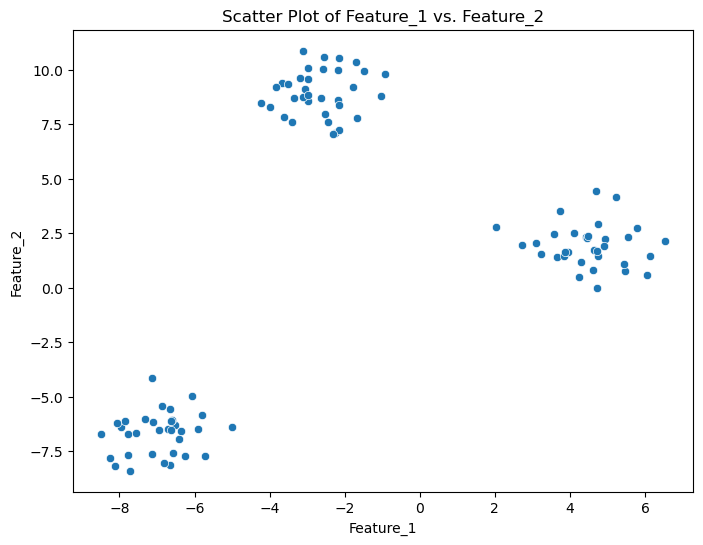

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'])
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.title("Scatter Plot of Feature_1 vs. Feature_2")
plt.show()

In [15]:
K = 3
kmeans = KMeans(n_clusters=K, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Feature_1', 'Feature_2']])

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


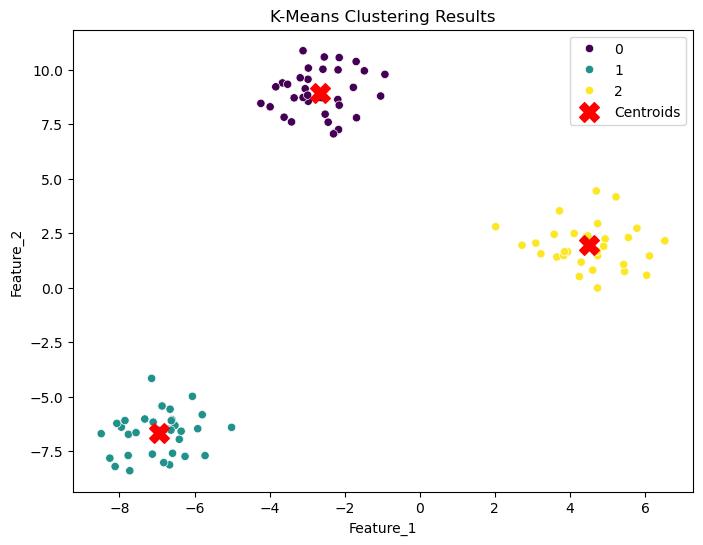

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['Cluster'], palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()

In [19]:
wcss = []
k_values = [2, 3, 4, 5]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Feature_1', 'Feature_2']])
    wcss.append(kmeans.inertia_)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

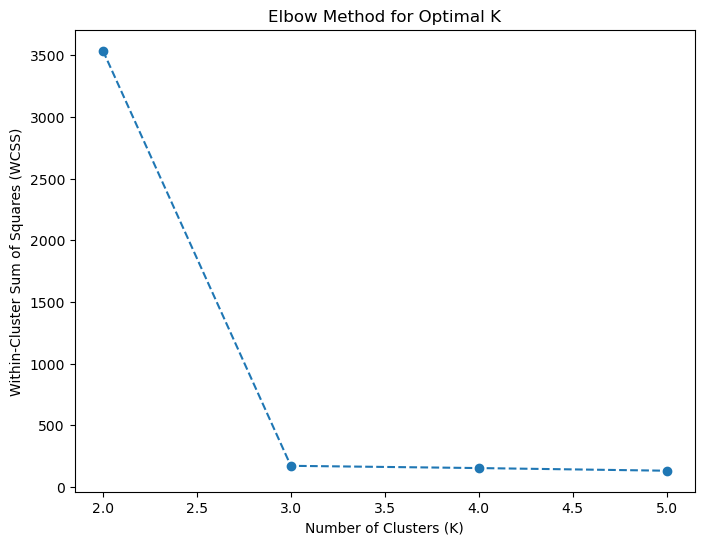

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

1. The scatter plot shows a clear separation of clusters.
2. The elbow curve suggests an optimal K around 3.
3. The silhouette score provides additional validation for the choice of K.
4. Some points near cluster boundaries may be misclassified due to overlapping regions.
5. Increasing K can lead to overfitting, while reducing K may cause under-segmentation.
